In [1]:
import numpy as np
from copy import deepcopy
import random
from random import uniform, choice, sample
from operator import attrgetter

In [2]:
# Create imaginary sudoku

row1=np.array([None,None,None  ,None,None,4   ,9,None,2   ])
row2=np.array([5,4,None,7,None,6,None,None,None])
row3=np.array([8   ,None,3,1,None,None,None,7,None])
row4=np.array([2,6,8,None,1,7,None   ,5,4])
row5=np.array([None,None,None,None,5,8,6,None,None  ])
row6=np.array([4,1,None,None,3   ,2,8,9,7])
row7=np.array([None,None,None   ,None,None,1,None,4   ,3])
row8=np.array([6,None,4,None,None   ,None,1,None,9   ])
row9=np.array([None,3,None,8,None,None   ,None,None,None]) 


fixed_numbers=np.array([row1,row2,row3,row4,row5,row6,row7,row8,row9], dtype=float)
fixed_numbers

array([[nan, nan, nan, nan, nan,  4.,  9., nan,  2.],
       [ 5.,  4., nan,  7., nan,  6., nan, nan, nan],
       [ 8., nan,  3.,  1., nan, nan, nan,  7., nan],
       [ 2.,  6.,  8., nan,  1.,  7., nan,  5.,  4.],
       [nan, nan, nan, nan,  5.,  8.,  6., nan, nan],
       [ 4.,  1., nan, nan,  3.,  2.,  8.,  9.,  7.],
       [nan, nan, nan, nan, nan,  1., nan,  4.,  3.],
       [ 6., nan,  4., nan, nan, nan,  1., nan,  9.],
       [nan,  3., nan,  8., nan, nan, nan, nan, nan]])

In [3]:
# Create a sample with all the numbers that will be used to produce random_sudokus

# Create a sample with 81 numbers, 9 * 9 different values

valid_sample=[1,1,1,1,1,1,1,1,1,
              2,2,2,2,2,2,2,2,2,
              3,3,3,3,3,3,3,3,3,
              4,4,4,4,4,4,4,4,4,
              5,5,5,5,5,5,5,5,5,
              6,6,6,6,6,6,6,6,6,
              7,7,7,7,7,7,7,7,7,
              8,8,8,8,8,8,8,8,8,
              9,9,9,9,9,9,9,9,9 ]

# Remove already existing values in the initial sudoku so that a sudoku has 9 numbers of each, as it should

for row in range(9):
    for col in range(9):
        if ~np.isnan(fixed_numbers[row,col]):
            valid_sample.remove(fixed_numbers[row,col])

In [4]:
# Generate rows

# This function creates random sudokus, giver the fixed initial numbers, using the valid sample created before

# The sudoku will be represented by an 9*9 array where each 1*9 array is a line.

def generate_rows(fixed_numbers, valid_sample):
    
    rows = deepcopy(fixed_numbers)
    valid_sample_=deepcopy(valid_sample)
    
    for row in range(rows.shape[0]):
        for col in range(rows.shape[1]):
            if np.isnan(rows[row,col]):
                rows[row,col]=np.random.choice(valid_sample_)
                valid_sample_.remove(rows[row,col])
            
    return rows

# Generate columns

# This function transforms the representation of the sudoku from a 9*9 array, where each 1*9 array is a line 
# into a 9*9 array where each 1*9 array is a column.

def get_columns(rows):
    columns=rows.transpose()
    return columns

# Generate squares

# This function transforms the representation of the sudoku from a 9*9 array, where each 1*9 array is a line 
# into a 9*9 array where each 1*9 array is a square.

def get_squares(rows):
    squares=np.full((9,9),np.nan)
    i_square=0
    for currentrow in [0,3,6]:
        for currentcol in [0,3,6]:
            squares[i_square]=rows[currentrow:currentrow+3,currentcol:currentcol+3].reshape((1,9))
            i_square+=1                
    return squares

In [5]:
def get_fitness(rows):

    columns= get_columns(rows)
    squares= get_squares(rows)

    # Evaluate Rows
    fitness_rows=0
    for i in rows:                        # this process is to evaluate the rows
        score=0
        perfect_row=False
        for value in np.arange(1,10):      # iterating by (1,2,3,4,5,6,7,8,9)

            x=(np.full((1,9),value))       # create 1*9 array with each value of above
            y=np.equal(x,i)                # create true´s and false´s array for each value, with true if corresponding value is in the corresponding position
            count_value=np.sum(y)          # count the number of trues... (if count>1, then there are repated numbers, which is wrong)
            score+= ((count_value-1)**2)   # square the count, to exponentially count the erros, and add to score
        
        if score==0:
            perfect_row=True
            
        if perfect_row:
            pass
        
        else:            
            fitness_rows +=score

    # Evaluate Columns                    # the process is the same, buf for columns now
    fitness_columns=0
    for i in columns:
        score=0
        perfect_column=False
        for value in np.arange(1,10):

            x=(np.full((1,9),value))
            y=np.equal(x,i)
            count_value=np.sum(y)
            score+= ((count_value-1)**2)
        
        if score==0:
            perfect_column=True
            
        if perfect_column:
            pass
        
        else:            
            fitness_columns +=score
            
    # Evaluate Squares                   # the process is the same, buf for squares now
    fitness_squares=0
    for i in squares:
        score=0
        perfect_square=False
        for value in np.arange(1,10):

            x=(np.full((1,9),value))
            y=np.equal(x,i)
            count_value=np.sum(y)
            score+= ((count_value-1)**2)
        
        if score==0:
            perfect_square=True
            
        if perfect_square:
            pass
        
        else:            
            fitness_squares +=score
            
            
        #final fitness

        fitness=fitness_rows+fitness_columns+fitness_squares

    return fitness

# This function evaluates if a wrong number is conflicting with an initial fixed number...
# If it is, that number is 100% certainly wrong, and then, that fitness should be even more depreciated

def validate_fitness(fixed_numbers, rows):
    
    
    columns=get_columns(rows)
    squares=get_squares(rows)

    score=0

    for sudoku_ in [rows,columns,squares]:

        for row in range(9):
            for col in range(9):

                if np.isnan(fixed_numbers[row,col]):            # If current value is none ( on the initial sudoku )
                    if sudoku_[row,col] in fixed_numbers[row]:  # If current value already exists in the row/column/square of
                                                                # the initial sudoku, its fitness gets worsen...
                        score+=5                        
    return score

In [6]:
# This functions creates an initial populatuon of random sudokus, givem the initial sudoku and the valid_sample
# the population is constituted by element of the class Individual, which is created further

def generate_pop(fixed_numbers, valid_sample, size=150 ):    
    
    pop=[]
    
    valid_sample_=deepcopy(valid_sample)
    
    for i in range(size):
        pop.append(Individual(fixed_numbers_=fixed_numbers, valid_sample__=valid_sample_))
        
    return pop

# This function calculates the fitness sharing coefficient given a certain individual and its population...
# it is used to preserve not as good but different individuals

def get_fitness_sharing_coefficient (indiv, pop):
    
    max_sharing=81
    total_similarity=0
    
    indiv=indiv.rows.flatten()
    
    for indiv2 in pop:
        
        indiv2=indiv2.rows.flatten()

        similarity= sum(np.equal(indiv, indiv2))  # similarity is calculated evaluating how many values are equal from
        similarity= similarity / max_sharing      # the objective individual and each individual in the population  

        total_similarity+= similarity
        
    return total_similarity

In [7]:
# point crossover slices 2 individuals and replaces each other´s cut slice with the other´s cut slice
def point_crossover(parent1, parent2):

    
    parent1=parent1.rows.flatten()
    parent2=parent2.rows.flatten()
    
    one_point=np.random.randint(80)
    print()
    
    offspring1=deepcopy(parent1)
    offspring2=deepcopy(parent2)

    
    offspring1[one_point:]=parent2[one_point:]
    offspring2[one_point:]=parent1[one_point:]
    
    offspring1=np.reshape(offspring1,(9,9))
    offspring2=np.reshape(offspring2,(9,9))
    
            
    return offspring1, offspring2

# This crossover swaps a 'n_changes' values between 2 parents, without changing the fixed numbers
# moreover, the numbers to be changed can be set to be only the wrong numbers (or the impossible numbers)

def crossover (parent1, parent2, wrong_indexes, n_changes=5, fixed_numbers=fixed_numbers):
    
    
    parent1=parent1.rows.flatten()
    parent2=parent2.rows.flatten()
    x=fixed_numbers.flatten()
    
    
    wrong_indexes=list(map(lambda x: 9*x[0]+x[1], wrong_indexes))
    
    fixed_indexes=[]
    
    for i in range(len(x)):
        if ~np.isnan(x[i]):
                fixed_indexes.append(i) 
                

    
    if len(wrong_indexes)>0:

        valid_indexes=list((set(wrong_indexes))-set(fixed_indexes))  
        indexes=np.random.choice(valid_indexes,n_changes)

    else:

        indexes=list((set(np.arange(81)))-set(fixed_indexes)) 

    offspr1=deepcopy(parent1)
    offspr2=deepcopy(parent2)
    
    for index in indexes:
        offspr1[index]=parent2[index]
        offspr2[index]=parent1[index]
        
    offspr1=np.reshape(offspr1,(9,9))
    offspr2=np.reshape(offspr2,(9,9))
        
    
    return offspr1, offspr2

In [8]:
# this mutation transforms 'n_changes' values from 2 different parents, using a random number generator
# moreover, the numbers to be changed can be set to be only the wrong numbers (or the impossible numbers)

def mutate (parent1, parent2, wrong_indexes, n_changes=3, fixed_numbers=fixed_numbers):
    
    x=fixed_numbers.flatten()
    fixed_indexes=[]

    
    for i in range(len(x)):
        if ~np.isnan(x[i]):
                fixed_indexes.append(i)  
                
    wrong_indexes=list(map(lambda x: 9*x[0]+x[1], wrong_indexes))
    
                
    
            
        
    offspr1=parent1.rows.flatten()
    offspr2=parent2.rows.flatten()
    

            
        
    if len(wrong_indexes)>0:

        valid_indexes=list((set(wrong_indexes))-set(fixed_indexes))  
        indexes=np.random.choice(valid_indexes,n_changes)

    else:

        indexes=list((set(np.arange(81)))-set(fixed_indexes)) 

            
    for offspr in ([offspr1,offspr2]):   

        for i in indexes:
            offspr[i]=np.random.randint(1,10)
            
    offspr1=np.reshape(offspr1,(9,9))
    offspr2=np.reshape(offspr2,(9,9))
    
    
    if len(wrong_indexes)<12 and len(wrong_indexes)>0:
        print(valid_indexes)


            
    return offspr1, offspr2 
    

In [9]:
def tournament_selection(population, size=5, optim='min'):
    """Tournament selection implementation.

    Args:
        population (Population): The population we want to select from.
        size (int): Size of the tournament.

    Returns:
        Individual: Best individual in the tournament.
    """

    # Select individuals based on tournament size
    tournament = [choice(population) for i in range(size)]
    sharing_fitnesses=[]
    for indiv in tournament:
        
        coefficient=get_fitness_sharing_coefficient(indiv,population)
        
        
        sharing_fitness= indiv.fitness*coefficient                    # This tournament selection implementation uses fitness sharing instead of fitness
        sharing_fitnesses.append(sharing_fitness)
        
    # Check if the problem is max or min
    if optim == 'max':
        return tournament[np.argmax(sharing_fitnesses)]
    elif optim == 'min':
        return tournament[np.argmin(sharing_fitnesses)]
    else:
        raise Exception("No optimization specified (min or max).")

        

In [10]:
def rank_selection(population, optim='min'):
    if optim == 'min':
        # Get the number of individuals
        n = len(population)
        
        # Gauss formula to get the sum of all ranks
        rank_sum = n*(n+1)/2
        
        # Get the spin
        spin = uniform(0, rank_sum) 
       
        position=0
        # Sort and go through all individual fitnesses; enumerate ranks from 1.
        for rank, ind_fitness in enumerate(sorted(ind.fitness for ind in population),1):
            position+=rank
            if position>spin:
                sorted_pop = sorted(population, key=lambda x: x.fitness)
                return(sorted_pop[rank-1])                

In [11]:
def roulette(population, optim='min'):
    """Fitness proportionate selection implementation.

    Args:
        population (Population): The population we want to select from.

    Returns:
        Individual: selected individual.
    """
    
# This roukette selection implementation uses fitness sharing instead of fitness

    if optim == "min":
        # Sum total fitness
        total_fake_fitness = sum([1000/(i.fitness*get_fitness_sharing_coefficient(i, population)) for i in population])
        # Get a 'position' on the wheel
        spin = uniform(0, total_fake_fitness)
        position = 0
        # Find individual in the position of the spin
        for individual in population:
            fake_fitness=1000/(individual.fitness*get_fitness_sharing_coefficient(i, population))
            position += fake_fitness
            
            if position > spin:
                return individual
    else:
         raise Exception("No optimization specified (min).")

In [12]:
def convert_square_index(index):  # This function is a very inefficient approach to get the universal representation of a sudoku´s 
                                  # indexes from the squares represenation of the sudoku´s index
    
    if (index)==(0,0):
        return (0 ,0 )
    if (index)==(0,1):
        return (0 ,1 )
    if (index)==(0,2):
        return (0 ,2 )
    if (index)==(0,3):
        return (1 ,0 )
    if (index)==(0,4):
        return (1 ,1 )
    if (index)==(0,5):
        return (1,2 )
    if (index)==(0,6):
        return (2,0 )
    if (index)==(0,7): 
        return (2,1 )
    if (index)==(0,8) :
        return (2,2 )
    if (index)==(1,0):
        return ( 0,3 )
    if (index)==(1,1):
        return ( 0,4 )
    if (index)==(1,2):
        return ( 0,5 )
    if (index)==(1,3) :
        return ( 1,3 )
    if (index)==(1,4) :
        return ( 1,4 )
    if (index)==(1,5):
        return ( 1,5 )
    if (index)==(1,6):
        return ( 2,3 )
    if (index)==(1,7):
        return ( 2,4 )
    if (index)==(1,8):
        return ( 2,5 )
    if (index)==(2,0):
        return ( 0,6 )
    if (index)==(2,1):
        return ( 0,7 )
    if (index)==(2,2):
        return ( 0,8 )
    if (index)==(2,3):
        return ( 1,6 )
    if (index)==(2,4):
        return ( 1, 7)
    if (index)==(2,5):
        return ( 1, 8)
    if (index)==(2,6):
        return ( 2,6 )
    if (index)==(2,7):
        return ( 2,7 )
    if (index)==(2,8): 
        return ( 2, 8)
    if (index)==(3,0):
        return ( 3,0 )
    if (index)==(3,1):
        return ( 3,1 )
    if (index)==(3,2):
        return (3 ,2 )
    if (index)==(3,3):
        return ( 4, 0)
    if (index)==(3,4):
        return ( 4, 1)
    if (index)==(3,5):
        return ( 4,2 )
    if (index)==(3,6):
        return ( 5,0 )
    if (index)==(3,7):
        return (5 , 1)
    if (index)==(3,8):
        return ( 5,2 )
    if (index)==(4,0):
        return ( 3, 3)
    if (index)==(4,1):
        return (3 ,4 )
    if (index)==(4,2):
        return ( 3, 5)
    if (index)==(4,3):
        return ( 4, 3)
    if (index)==(4,4):
        return (4 ,4 )
    if (index)==(4,5):
        return (4 ,5 )
    if (index)==(4,6):
        return (5 ,3 )
    if (index)==(4,7):
        return (5 , 4)
    if (index)==(4,8):
        return ( 5, 5)
    if (index)==(5,0):
        return ( 3,6 )
    if (index)==(5,1):
        return ( 3, 7)
    if (index)==(5,2):
        return ( 3, 8)
    if (index)==(5,3):
        return ( 4,6 )
    if (index)==(5,4):
        return (4 , 7)
    if (index)==(5,5):
        return ( 4, 8)
    if (index)==(5,6):
        return ( 5,6 )
    if (index)==(5,7):
        return ( 5, 7)
    if (index)==(5,8):
        return (5 ,8 )
    if (index)==(6,0):
        return ( 6,0 )
    if (index)==(6,1):
        return ( 6, 1)
    if (index)==(6,2):
        return ( 6,2 )
    if (index)==(6,3):
        return ( 7, 0)
    if (index)==(6,4):
        return ( 7,1 )
    if (index)==(6,5):
        return ( 7,2 )
    if (index)==(6,6):
        return ( 8, 0)
    if (index)==(6,7):
        return ( 8, 1)
    if (index)==(6,8):
        return ( 8, 2)
    if (index)==(7,0):
        return ( 6,3 )
    if (index)==(7,1):
        return ( 6,4 )
    if (index)==(7,2):
        return ( 6,5 )
    if (index)==(7,3):
        return ( 7,3 )
    if (index)==(7,4):
        return ( 7, 4)
    if (index)==(7,5):
        return ( 7, 5)
    if (index)==(7,6):
        return ( 8, 3)
    if (index)==(7,7):
        return ( 8, 4)
    if (index)==(7,8):
        return ( 8, 5)
    if (index)==(8,0):
        return ( 6,6 )
    if (index)==(8,1):
        return ( 6,7 )
    if (index)==(8,2):
        return ( 6,8 )
    if (index)==(8,3):
        return ( 7,6 )
    if (index)==(8,4):
        return ( 7,7 )
    if (index)==(8,5):
        return ( 7,8 )
    if (index)==(8,6):
        return (8 ,6 )
    if (index)==(8,7):
        return (8 , 7)
    if (index)==(8,8):
        return ( 8,8)

In [13]:
# This function returns the wrong values´ indexes in a given sudoku

def get_wrong_indexes(sudoku):

    columns= get_columns(sudoku)
    squares= get_squares(sudoku)

    to_change=[]


    for row in range(sudoku.shape[0]):               # iterrating each row ( each 1*9 array)
        for value in np.arange(1,10):                # iterating by each possible value (1,2,3,4,5,6,7,8,9)

            x=(np.full((1,9),value))                 # create 1*9 array with each value of above
            y=np.equal(x,sudoku[row])                # create true´s and false´s array for each value, with true if corresponding value is in the corresponding position
            if np.sum(y)>1:                          # count the number of trues... (if count>1, then there are repated numbers, which is wrong)
                for index in range(y.shape[1]):      # iterate by the true/false array to get the wrong indexes
                    if y[0][index]==True:
                        to_change.append((row,index))

    
    for column in range(columns.shape[0]):           # repeat the process for the columns
        for value in np.arange(1,10):

            x=(np.full((1,9),value))
            y=np.equal(x,columns[column])
            if np.sum(y)>1:
                for index in range(y.shape[1]):
                    if y[0][index]==True:
                        to_change.append((index,column))  # adapt the indexes to the universal (rows) representation

    for square in range(squares.shape[0]):           # repeat the process for the squares
        for value in np.arange(1,10):

            x=(np.full((1,9),value))
            y=np.equal(x,squares[square])
            if np.sum(y)>1:
                for index in range(y.shape[1]):
                    if y[0][index]==True:
                        to_change.append(convert_square_index((square,index))) # adapt the indexes to the universal (rows) representation
                        
    return set(to_change)


# This function also returns wrong indexes... 

# Howewer, it is more specific as it returns the indexes which are wrong for sure,
# since they are in conflict with fixed numbers from the initial sudoku

def get_impossible_indexes(fixed_numbers, rows):
    
    columns=get_columns(rows)
    squares=get_squares(rows)
    
    columns_fixed=get_columns(fixed_numbers) # Get the columns representation of the fixed numbers
    squares_fixed=get_columns(fixed_numbers) # Get the squares representation of the fixed numbers

    impossible_indexes=[]
    
    loop=0
    for sudoku_ in [rows,columns,squares]:
        loop+=1                             # this loop is used to track if we are evaluting rows, columns or squares in order to
                                            # return the universal (rows) representation of the indexes 
        

        for row in range(9):
            for col in range(9):
                
                if loop==1:
                    if np.isnan(fixed_numbers[row,col]):
                        if sudoku_[row,col] in fixed_numbers[row]:
                                impossible_indexes.append((row,col))
                    
                    
                if loop==2:
                    if np.isnan(columns_fixed[row,col]):
                        if sudoku_[row,col] in get_columns(fixed_numbers)[row]:

                                impossible_indexes.append((col,row))
               
                
                if loop==3:
                    if np.isnan(squares_fixed[row,col]):
                        if sudoku_[row,col] in get_squares(fixed_numbers)[row]:

                                a=convert_square_index((row,col))
                                impossible_indexes.append(a)
                                                       
    return set(impossible_indexes)

In [14]:
# This class represents an individual, a sudoku

# An Individual always has fixed_numbers (a sudoku can only be solved if it exists...)
# It receives a valid_sample, so that it can be created in case the Individual is about to born...

# It can, or not, already exist, so the argument rows is default to None. 
# However, if it doesn´t exist it will be randomly assigned the numbers from the valid sample

# An individual always has a fitness associated to him... using the functuon created in the beginning
# howewer, the function can or not be that complex, it depend on the results obtained (validate_fitness might or might not be usefu)

class Individual:
    def __init__(self, fixed_numbers_, valid_sample__, rows_=None):
        
        self.fixed_numbers= fixed_numbers_
        if rows_ is None:
            self.rows= generate_rows(fixed_numbers_, valid_sample__)
        else:
            self.rows=rows_
        
        self.fitness= get_fitness(self.rows)
        
        #self.fitness+= validate_fitness(rows=self.rows, fixed_numbers=fixed_numbers)

In [15]:
def run_ga_sudoku(init_sudoku, pop_size, valid_sample,
                  selection='tournament', optim='min',
                  max_generations=100,  cp=80,  elitism=True):
                  
    pop=generate_pop(size=pop_size, fixed_numbers=init_sudoku, valid_sample = valid_sample )
    best_fitness=9999999

    wrong_indexes=[]
    n_changes=5
    Emergency=False
    
    gens=[]
    fitnesses=[]
    n_errors=[]
    
    

    
    for gen in range(max_generations):
        print(f'\nGen: {gen}')
        

        new_pop=[]
        if gen>0:
            
            if elitism:
                new_pop.append(best)
                wrong_indexes=get_wrong_indexes(best_sudoku)
            

        
            

            if (new_best_fitness<best_fitness) | Emergency:  # If the GA is evolving again or if we had an Emergency last generation, we return to normal
                print('Evoluíndo...')
                best_fitness=new_best_fitness
                count=0
                n_changes=5
                Emergency=False
                elitism=True

            else:
                count+=1                # This counts the number of generations that the GA is not improving 


            if count==4:
                Emergency=True

            if Emergency:
                print('EMERGENCYYYY')   # If the GA is not improving, then we procced to more disruptive genetic operations
                                        # We change completely numbers, and 15 of them ( instead of 5)
                                        # Or we change only all the impossible numbers
                                        # We also disregard Elitism for this generation, since we don´t want the GA to be stick in this local optimum
                
                elitism=False
                wrong_indexes=get_impossible_indexes(rows=best.rows, fixed_numbers=fixed_numbers)
                n_changes=len(wrong_indexes)
                #wrong_indexes=[]
                #n_changes=15
            
        
        while len(new_pop)<pop_size:
            
            parents=[]

            for parentx in range(2):

                if selection=='tournament':
                    parent=tournament_selection(pop)
                    parents.append(parent) 
                
                if selection=='rank':
                    parent=rank_selection(pop)
                    parents.append(parent) 
                    
                if selection=='roulette':
                    parent=fps_selection(pop)
                    parents.append(parent) 
            
            rng=np.random.randint(0,100)
            

            if rng<cp:
                #print('crossover')
                offspr_rows1,offspr_rows2= crossover(parents[0],parents[1], n_changes=n_changes, wrong_indexes=wrong_indexes)
                
                offspr1=Individual(fixed_numbers_=init_sudoku, rows_=offspr_rows1, valid_sample__=valid_sample)
                offspr2=Individual(fixed_numbers_=init_sudoku, rows_=offspr_rows2, valid_sample__=valid_sample)

            else:
                #print('mutation')
                offspr_rows1,offspr_rows2= mutate(parents[0],parents[1], wrong_indexes=wrong_indexes)
                
                offspr1=Individual(fixed_numbers_=init_sudoku, rows_=offspr_rows1, valid_sample__=valid_sample)
                offspr2=Individual(fixed_numbers_=init_sudoku, rows_=offspr_rows2, valid_sample__=valid_sample)
                
            new_pop.append(offspr1)
            new_pop.append(offspr2) 
         
        
        if optim == "max":
            best= max(new_pop, key=attrgetter("fitness"))
        elif optim == "min":
            best= min(new_pop, key=attrgetter("fitness"))        
        
        
        new_best_fitness=best.fitness
        best_sudoku=best.rows
        
        print(f'Best fitness: {new_best_fitness}')
        pop=new_pop
        
        gens.append(gen)
        fitnesses.append(new_best_fitness)
        n_errors.append(len(get_wrong_indexes(best_sudoku)))
        
        
        
    wronggg=get_wrong_indexes(best_sudoku)
    print(f'Wrong indexes: {wronggg}')

    
    return np.array((best, gens, fitnesses, n_errors))

In [17]:
results_final=[]
for i in range(10):
    
    ga=run_ga_sudoku(init_sudoku=fixed_numbers, pop_size=125, cp=80, valid_sample=valid_sample, elitism=True, max_generations=125, selection='tournament')
    results_final.append(ga)


Gen: 0
Best fitness: 120

Gen: 1
Evoluíndo...
Best fitness: 112

Gen: 2
Evoluíndo...
Best fitness: 110

Gen: 3
Evoluíndo...
Best fitness: 108

Gen: 4
Evoluíndo...
Best fitness: 102

Gen: 5
Evoluíndo...
Best fitness: 98

Gen: 6
Evoluíndo...
Best fitness: 96

Gen: 7
Evoluíndo...
Best fitness: 88

Gen: 8
Evoluíndo...
Best fitness: 88

Gen: 9
Best fitness: 82

Gen: 10
Evoluíndo...
Best fitness: 80

Gen: 11
Evoluíndo...
Best fitness: 76

Gen: 12
Evoluíndo...
Best fitness: 72

Gen: 13
Evoluíndo...
Best fitness: 66

Gen: 14
Evoluíndo...
Best fitness: 66

Gen: 15
Best fitness: 62

Gen: 16
Evoluíndo...
Best fitness: 62

Gen: 17
Best fitness: 60

Gen: 18
Evoluíndo...
Best fitness: 54

Gen: 19
Evoluíndo...
Best fitness: 54

Gen: 20
Best fitness: 50

Gen: 21
Evoluíndo...
Best fitness: 48

Gen: 22
Evoluíndo...
Best fitness: 48

Gen: 23
Best fitness: 44

Gen: 24
Evoluíndo...
Best fitness: 40

Gen: 25
Evoluíndo...
Best fitness: 38

Gen: 26
Evoluíndo...
Best fitness: 38

Gen: 27
Best fitness: 34

Gen

C:\Users\Admin\AppData\Local\Temp\ipykernel_22340\2097430493.py:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array((best, gens, fitnesses, n_errors))



Gen: 0
Best fitness: 112

Gen: 1
Evoluíndo...
Best fitness: 106

Gen: 2
Evoluíndo...
Best fitness: 92

Gen: 3
Evoluíndo...
Best fitness: 92

Gen: 4
Best fitness: 90

Gen: 5
Evoluíndo...
Best fitness: 88

Gen: 6
Evoluíndo...
Best fitness: 84

Gen: 7
Evoluíndo...
Best fitness: 82

Gen: 8
Evoluíndo...
Best fitness: 78

Gen: 9
Evoluíndo...
Best fitness: 74

Gen: 10
Evoluíndo...
Best fitness: 68

Gen: 11
Evoluíndo...
Best fitness: 66

Gen: 12
Evoluíndo...
Best fitness: 66

Gen: 13
Best fitness: 62

Gen: 14
Evoluíndo...
Best fitness: 60

Gen: 15
Evoluíndo...
Best fitness: 60

Gen: 16
Best fitness: 58

Gen: 17
Evoluíndo...
Best fitness: 58

Gen: 18
Best fitness: 56

Gen: 19
Evoluíndo...
Best fitness: 54

Gen: 20
Evoluíndo...
Best fitness: 46

Gen: 21
Evoluíndo...
Best fitness: 46

Gen: 22
Best fitness: 44

Gen: 23
Evoluíndo...
Best fitness: 44

Gen: 24
Best fitness: 44

Gen: 25
Best fitness: 42

Gen: 26
Evoluíndo...
Best fitness: 42

Gen: 27
Best fitness: 42

Gen: 28
Best fitness: 42

Gen: 2


Gen: 0
Best fitness: 122

Gen: 1
Evoluíndo...
Best fitness: 116

Gen: 2
Evoluíndo...
Best fitness: 108

Gen: 3
Evoluíndo...
Best fitness: 102

Gen: 4
Evoluíndo...
Best fitness: 102

Gen: 5
Best fitness: 90

Gen: 6
Evoluíndo...
Best fitness: 90

Gen: 7
Best fitness: 86

Gen: 8
Evoluíndo...
Best fitness: 86

Gen: 9
Best fitness: 80

Gen: 10
Evoluíndo...
Best fitness: 78

Gen: 11
Evoluíndo...
Best fitness: 72

Gen: 12
Evoluíndo...
Best fitness: 72

Gen: 13
Best fitness: 70

Gen: 14
Evoluíndo...
Best fitness: 66

Gen: 15
Evoluíndo...
Best fitness: 64

Gen: 16
Evoluíndo...
Best fitness: 60

Gen: 17
Evoluíndo...
Best fitness: 56

Gen: 18
Evoluíndo...
Best fitness: 56

Gen: 19
Best fitness: 54

Gen: 20
Evoluíndo...
Best fitness: 52

Gen: 21
Evoluíndo...
Best fitness: 52

Gen: 22
Best fitness: 50

Gen: 23
Evoluíndo...
Best fitness: 48

Gen: 24
Evoluíndo...
Best fitness: 46

Gen: 25
Evoluíndo...
Best fitness: 46

Gen: 26
Best fitness: 46

Gen: 27
Best fitness: 44

Gen: 28
Evoluíndo...
Best fit

Best fitness: 20

Gen: 123
Best fitness: 20

Gen: 124
EMERGENCYYYY
Best fitness: 20
Wrong indexes: {(8, 0), (8, 6), (2, 2), (1, 6), (2, 5), (7, 4), (7, 1), (6, 5), (6, 8), (4, 1), (8, 4), (8, 1), (8, 7), (0, 0), (1, 1), (7, 2), (6, 0), (7, 5), (6, 3)}

Gen: 0
Best fitness: 128

Gen: 1
Evoluíndo...
Best fitness: 114

Gen: 2
Evoluíndo...
Best fitness: 108

Gen: 3
Evoluíndo...
Best fitness: 104

Gen: 4
Evoluíndo...
Best fitness: 102

Gen: 5
Evoluíndo...
Best fitness: 94

Gen: 6
Evoluíndo...
Best fitness: 94

Gen: 7
Best fitness: 94

Gen: 8
Best fitness: 90

Gen: 9
Evoluíndo...
Best fitness: 90

Gen: 10
Best fitness: 86

Gen: 11
Evoluíndo...
Best fitness: 84

Gen: 12
Evoluíndo...
Best fitness: 80

Gen: 13
Evoluíndo...
Best fitness: 78

Gen: 14
Evoluíndo...
Best fitness: 76

Gen: 15
Evoluíndo...
Best fitness: 72

Gen: 16
Evoluíndo...
Best fitness: 70

Gen: 17
Evoluíndo...
Best fitness: 68

Gen: 18
Evoluíndo...
Best fitness: 64

Gen: 19
Evoluíndo...
Best fitness: 60

Gen: 20
Evoluíndo...
Bes

Best fitness: 18

Gen: 113
Best fitness: 18

Gen: 114
Best fitness: 18

Gen: 115
Best fitness: 18

Gen: 116
EMERGENCYYYY
Best fitness: 18

Gen: 117
Evoluíndo...
Best fitness: 18

Gen: 118
Best fitness: 18

Gen: 119
Best fitness: 18

Gen: 120
Best fitness: 18

Gen: 121
EMERGENCYYYY
Best fitness: 18

Gen: 122
Evoluíndo...
Best fitness: 18

Gen: 123
Best fitness: 18

Gen: 124
Best fitness: 18
Wrong indexes: {(6, 2), (7, 1), (7, 7), (0, 0), (1, 1), (0, 3), (5, 4), (8, 0), (4, 2), (1, 4), (8, 3), (6, 3), (2, 6), (1, 6), (0, 8), (2, 5)}

Gen: 0
Best fitness: 122

Gen: 1
Evoluíndo...
Best fitness: 116

Gen: 2
Evoluíndo...
Best fitness: 114

Gen: 3
Evoluíndo...
Best fitness: 108

Gen: 4
Evoluíndo...
Best fitness: 98

Gen: 5
Evoluíndo...
Best fitness: 98

Gen: 6
Best fitness: 90

Gen: 7
Evoluíndo...
Best fitness: 86

Gen: 8
Evoluíndo...
Best fitness: 78

Gen: 9
Evoluíndo...
Best fitness: 78

Gen: 10
Best fitness: 76

Gen: 11
Evoluíndo...
Best fitness: 76

Gen: 12
Best fitness: 72

Gen: 13
Evolu

Best fitness: 22

Gen: 108
Best fitness: 22

Gen: 109
Best fitness: 22

Gen: 110
Best fitness: 22

Gen: 111
EMERGENCYYYY
Best fitness: 22

Gen: 112
Evoluíndo...
Best fitness: 22

Gen: 113
Best fitness: 22

Gen: 114
Best fitness: 22

Gen: 115
Best fitness: 18

Gen: 116
Evoluíndo...
Best fitness: 18

Gen: 117
Best fitness: 18

Gen: 118
Best fitness: 18

Gen: 119
Best fitness: 18

Gen: 120
EMERGENCYYYY
Best fitness: 18

Gen: 121
Evoluíndo...
Best fitness: 18

Gen: 122
Best fitness: 18

Gen: 123
Best fitness: 18

Gen: 124
Best fitness: 18
Wrong indexes: {(8, 8), (3, 8), (2, 4), (0, 4), (4, 3), (5, 8), (1, 5), (1, 8), (1, 4), (3, 3), (8, 6), (5, 3), (1, 6), (0, 8), (6, 3), (4, 1)}

Gen: 0
Best fitness: 124

Gen: 1
Evoluíndo...
Best fitness: 116

Gen: 2
Evoluíndo...
Best fitness: 104

Gen: 3
Evoluíndo...
Best fitness: 100

Gen: 4
Evoluíndo...
Best fitness: 92

Gen: 5
Evoluíndo...
Best fitness: 88

Gen: 6
Evoluíndo...
Best fitness: 86

Gen: 7
Evoluíndo...
Best fitness: 84

Gen: 8
Evoluíndo...

In [21]:
current_fitness=0
avg_fitnesses_final=[]
results_final=np.asarray(results_final)

for gen in range(125):
    current_fitness=0
    for result in range(results_final.shape[0]):
        current_fitness+= results_final[result][3][gen]
    avg_fitnesses_final.append(current_fitness/results_final.shape[0])

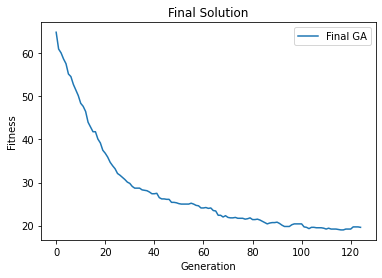

In [23]:
import matplotlib.pyplot as plt

plt.plot(np.arange(125),avg_fitnesses_final, label='Final GA')
#plt.plot(np.arange(90),avg_fitnesses_fit2, label='More complex fitness function')
#plt.plot(np.arange(90),avg_rank_fitnesses, label='Rank')

plt.title('Final Solution')
plt.legend(loc="upper right")
plt.xlabel('Generation')
plt.ylabel('Fitness')


plt.show()